# ALMA Tutorials: MuMax3 Workshop
Author: David Cortés-Ortuño

Utrecht University, Netherlands <img src="https://upload.wikimedia.org/wikipedia/en/thumb/2/26/Utrecht_University_logo.svg/1280px-Utrecht_University_logo.svg.png" height=30 width=30 style="display: inline-block;">

Credits to: The Dynamat Team from Ghent University and the [MuMax3 Workshop](https://mumax.ugent.be/mumax3-workshop/); Google 

## Using Google Colab

This notebook will help you to install and run MuMax3 in a Google Colab (GC) machine. The GC interface is based on the Python 🐍 programming language using a Jupyter notebook. To run the commands press `Shift+Enter/Return` in every cell.

To run commands as in the command line interface (in the shell) we prepend an exclamation sign `!` to the commands. In this case we can see we are running Linux:

In [46]:
!echo "This Google Colab machine runs" $(uname -a)

This Google Colab machine runs Linux f1c82c984ae3 5.4.104+ #1 SMP Sat Jun 5 09:50:34 PDT 2021 x86_64 x86_64 x86_64 GNU/Linux


The GC machines can be used with a GPU, which we can confirm by running the `nvidia` System Management Interface command and which also tells us the CUDA version:

In [2]:
!nvidia-smi

Thu Nov 18 12:36:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

If the GPU is not enabled in your GC machine, you can activate it by going to:

`Runtime -> Change runtime type`

in the top menu and choosing GPU.

We can now install MuMax3 in this machine by downloading the code binaries and add the `mumax3` command to the environment paths which allows us to run the simulations:

In [47]:
# Download the mumax3 binary
!wget https://mumax.ugent.be/mumax3-binaries/mumax3.10_linux_cuda10.1.tar.gz
!tar -xvf mumax3.10_linux_cuda10.1.tar.gz
!rm mumax3.10_linux_cuda10.1.tar.gz
!rm -rf mumax3.10 && mv mumax3.10_linux_cuda10.1 mumax3.10

#update the PATH environment variable
import os
os.environ['PATH'] += ":/content/mumax3.10"

--2021-11-18 14:24:50--  https://mumax.ugent.be/mumax3-binaries/mumax3.10_linux_cuda10.1.tar.gz
Resolving mumax.ugent.be (mumax.ugent.be)... 157.193.40.77
Connecting to mumax.ugent.be (mumax.ugent.be)|157.193.40.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150707207 (144M) [application/x-gzip]
Saving to: ‘mumax3.10_linux_cuda10.1.tar.gz’

mumax3.10_linux_cud 100%[===================>] 143.73M  25.5MB/s    in 6.5s    

2021-11-18 14:24:58 (22.0 MB/s) - ‘mumax3.10_linux_cuda10.1.tar.gz’ saved [150707207/150707207]

mumax3.10_linux_cuda10.1/
mumax3.10_linux_cuda10.1/mumax3-server
mumax3.10_linux_cuda10.1/lib/
mumax3.10_linux_cuda10.1/lib/libcurand.so.10
mumax3.10_linux_cuda10.1/lib/libcufft.so.10
mumax3.10_linux_cuda10.1/mumax3
mumax3.10_linux_cuda10.1/LICENSE
mumax3.10_linux_cuda10.1/mumax3-convert


Note that commands without `!` are run using normal Python.

In [ ]:
!mumax3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla K80(11441MB), CUDA Driver 11.2, cc=3.7, using cc=37 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//


## Running a script using the command line interface

We can test MuMax3 is installed correctly by clonning Std Problem 4 script from one of the MuMax3 developers (see also https://mumax.ugent.be/mumax3-workshop/ ):

In [ ]:
# Download an examplary script
!wget https://raw.githubusercontent.com/JeroenMulkers/mumax3-tutorial/master/standardproblem4.mx3 -O standardproblem4.mx3

You can check this is downloaded by looking at the files in the left side panel. Now we run this script ⌛️:

In [ ]:
!mumax3 standardproblem4.mx3

And finally we can check the outputs by converting the output file to a `png` image:

In [ ]:
!mumax3-convert -arrows 20 -png -resize 256x128x4 /content/standardproblem4.out/m000000.ovf 

Which we can plot using the `Image` command from Python:

In [ ]:
from IPython.display import Image

Image('standardproblem4.out/m000000.png')

## Running a script using Python

Alternatively, we can also run a script by writing it using Python, saving the file and then running it:

In [ ]:
import textwrap  # this library helps to remove whitespaces to the left

In [ ]:
# Here we create a string with the simulation script:
my_simulation = textwrap.dedent("""
SetGridsize(128, 32, 1)
SetCellsize(500e-9/128, 125e-9/32, 3e-9)

Msat  = 800e3
Aex   = 13e-12
alpha = 0.02

m = uniform(1, .1, 0)
relax()
save(m)    // relaxed state

autosave(m, 200e-12)
tableautosave(10e-12)

B_ext = vector(-24.6E-3, 4.3E-3, 0)
run(1e-9)
""")

with open('std_prob4_usingpython.mx3', 'w') as f:
    f.write(my_simulation)

We can now run this script ⌛️:

In [ ]:
!mumax3 std_prob4_usingpython.mx3

Note that in this case, we can use all the advantages of Python, like replacing variables with numerical values 😀

# Standard Problem 2

In [ ]:
from IPython.display import Image

In [ ]:
!rm -r std_prob_2.out

In [ ]:
!mumax3 std_prob_2.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla K80(11441MB), CUDA Driver 11.2, cc=3.7, using cc=37 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: std_prob_2.out/
//starting GUI at http://127.0.0.1:35367
lex := 5e-9
d := 30 * lex
lx := 5 * d
ly := 1 * d
lz := 0.1 * d
Ms := 1.0 / mu0
Msat = Ms
Aex = 0.5 * mu0 * lex * lex * pow(Ms, 2)
nx := pow(2, ilogb(lx/(0.5*lex))+1)
ny := pow(2, ilogb(ly/(0.5*lex))+1)
Print(nx, ny)
//512 64
Print(lx)
//7.5e-07
print(ly)
//1.5e-07
print(lz)
//1.5e-08
SetGridSize(nx, ny, 1)
SetCellSize(lx/nx, ly/ny, lz/1.)
snapshot(geom)
m = uniform(1., 1., 0.9)


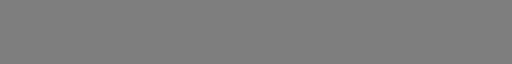

In [ ]:
Image('/content/std_prob_2.out/geom000000.jpg')

In [ ]:
!mumax3-convert -png -arrows 32 /content/std_prob_2.out/m_relaxed.ovf

/content/std_prob_2.out/m_relaxed.ovf
[ ok ] /content/std_prob_2.out/m_relaxed.ovf	-> /content/std_prob_2.out/m_relaxed.png
1 files converted,  0 skipped,  0 failed


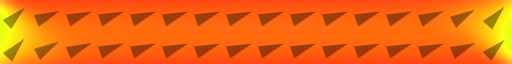

In [ ]:
Image('/content/std_prob_2.out/m_relaxed.png')

In [ ]:
!mumax3-convert -vtk ascii /content/std_prob_2.out/*.ovf

/content/std_prob_2.out/m000000.ovf
/content/std_prob_2.out/m000001.ovf
/content/std_prob_2.out/m000002.ovf
/content/std_prob_2.out/m000003.ovf
/content/std_prob_2.out/m000004.ovf
/content/std_prob_2.out/m000005.ovf
/content/std_prob_2.out/m000006.ovf
/content/std_prob_2.out/m000007.ovf
/content/std_prob_2.out/m000008.ovf
/content/std_prob_2.out/m000009.ovf
/content/std_prob_2.out/m000010.ovf
/content/std_prob_2.out/m000011.ovf
/content/std_prob_2.out/m000012.ovf
/content/std_prob_2.out/m000013.ovf
/content/std_prob_2.out/m000014.ovf
/content/std_prob_2.out/m000015.ovf
/content/std_prob_2.out/m000016.ovf
/content/std_prob_2.out/m_initial.ovf
/content/std_prob_2.out/m_relaxed.ovf
[ ok ] /content/std_prob_2.out/m000000.ovf	-> /content/std_prob_2.out/m000000.vts
[ ok ] /content/std_prob_2.out/m000002.ovf	-> /content/std_prob_2.out/m000002.vts
[ ok ] /content/std_prob_2.out/m000001.ovf	-> /content/std_prob_2.out/m000001.vts
[ ok ] /content/std_prob_2.out/m000003.ovf	-> /content/std_prob_2.

In [ ]:
!cat /content/std_prob_2.out/table.txt

# t (s)	mx ()	my ()	mz ()	B_extx (T)	B_exty (T)	B_extz (T)
0	0.8366589	0.5177043	0.11912261	0.11547005	0.11547005	0.11547005
0	0.84650064	0.5020513	0.10893634	0.10392303	0.10392303	0.10392303
0	0.8573126	0.4835291	0.09839289	0.092376046	0.092376046	0.092376046
0	0.8691863	0.46144244	0.08748005	0.08082903	0.08082903	0.08082903
0	0.8822106	0.4348294	0.07618617	0.06928203	0.06928203	0.06928203
0	0.896375	0.40248334	0.06450109	0.057735026	0.057735026	0.057735026
0	0.9115373	0.36278507	0.052416623	0.046188023	0.046188023	0.046188023
0	0.927272	0.31359664	0.03992707	0.034641016	0.034641016	0.034641016
0	0.942641	0.25208497	0.02702954	0.023094011	0.023094011	0.023094011
0	0.9557905	0.17441438	0.013722416	0.011547006	0.011547006	0.011547006
0	0.9631673	0.07509691	1.3067269e-17	1.20185166e-17	1.20185166e-17	1.20185166e-17
0	0.957629	-0.0549355	-0.014164388	-0.011547006	-0.011547006	-0.011547006
0	0.9219202	-0.23860845	-0.028895777	-0.023094011	-0.023094011	-0.023094011
0	-0.927272	-0.31359643	-

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.loadtxt('/content/std_prob_2.out/table.txt')

## Python calc

In [ ]:
m = data[:, 1:4]
B = data[:, 4:7]

In [ ]:
m_dot_Bdir = []
Bdir = np.array([1., 1., 1.]) / np.sqrt(3)
i = 0
for row in m:
  result = np.dot(row, Bdir)
  Bnorm = np.dot(B[i], Bdir)

  m_dot_Bdir.append([Bnorm, result])

  i += 1

m_dot_Bdir = np.array(m_dot_Bdir)

In [ ]:
m_dot_Bdir

array([[ 1.99999993e-01,  8.50717429e-01],
       [ 1.79999968e-01,  8.41481251e-01],
       [ 1.60000005e-01,  8.30942478e-01],
       [ 1.39999987e-01,  8.18745492e-01],
       [ 1.19999996e-01,  8.04379504e-01],
       [ 9.99999984e-02,  7.87135934e-01],
       [ 8.00000025e-02,  7.65993115e-01],
       [ 5.99999997e-02,  7.39467748e-01],
       [ 4.00000004e-02,  7.05380873e-01],
       [ 2.00000011e-02,  6.60446732e-01],
       [ 2.08166814e-17,  5.99442121e-01],
       [-2.00000011e-02,  5.12992522e-01],
       [-4.00000004e-02,  3.77827238e-01],
       [-5.99999997e-02, -7.39467627e-01],
       [-8.00000025e-02, -7.65991510e-01],
       [-9.99999984e-02, -7.87134964e-01]])

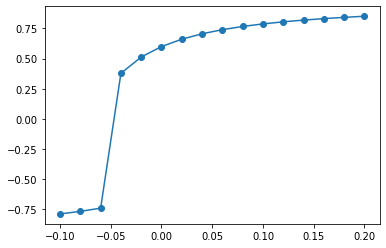

In [ ]:
plt.plot(m_dot_Bdir[:, 0], m_dot_Bdir[:, 1], 'o-')

## Mumax calc

In [ ]:
!cat /content/std_prob_2.out/table.txt

# t (s)	mx ()	my ()	mz ()	B_extx (T)	B_exty (T)	B_extz (T)	B_norm (T)	m.Bdir ()
0	0.83665884	0.5177045	0.11912261	0.11547005	0.11547005	0.11547005	0.2	0.99881303
0	0.84146494	0.51019955	0.11407334	0.10969656	0.10969656	0.10969656	0.19	0.8507175
0	0.84649986	0.5020527	0.10893635	0.10392303	0.10392303	0.10392303	0.18	0.84624416
0	0.8517775	0.49319118	0.103710055	0.098149545	0.098149545	0.098149545	0.17	0.8414816
0	0.85730946	0.48353553	0.09839293	0.092376046	0.092376046	0.092376046	0.16	0.8363951
0	0.8631101	0.47298643	0.09298341	0.08660254	0.08660254	0.08660254	0.15	0.8309444
0	0.8691891	0.46143833	0.08748005	0.08082903	0.08082903	0.08082903	0.14	0.8250797
0	0.87555534	0.44876534	0.081881404	0.07505553	0.07505553	0.07505553	0.13	0.8187447
0	0.88221085	0.4348289	0.07618617	0.06928203	0.06928203	0.06928203	0.12	0.8118712
0	0.8891536	0.41946602	0.070393115	0.06350853	0.06350853	0.06350853	0.11	0.80437934
0	0.89636946	0.40249467	0.06450113	0.057735026	0.057735026	0.057735026	0.1	0.79617345


In [ ]:
data_table = np.loadtxt('/content/std_prob_2.out/table.txt')

In [ ]:
data_table[0]

array([0.        , 0.83665884, 0.5177045 , 0.11912261, 0.11547005,
       0.11547005, 0.11547005, 0.2       , 0.99881303])

In [ ]:
Bnorm = data_table[:, 7]
m_dot_Bdir = data_table[:, -1]

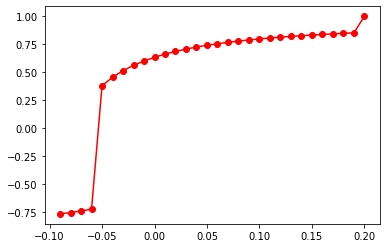

In [ ]:
plt.plot(Bnorm, m_dot_Bdir, 'o-', c='red')

In [ ]:
!mumax3-convert -png -arrows 16 /content/std_prob_2.out/m*.ovf

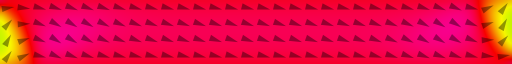

In [ ]:
Image('/content/std_prob_2.out/m000024.png')

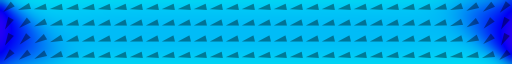

In [ ]:
Image('/content/std_prob_2.out/m000025.png')

# Std problem 3

In [ ]:
from IPython.display import Image

In [ ]:
!rm -r /content/std_prob_3.out

In [ ]:
!mumax3 std_prob_3.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla K80(11441MB), CUDA Driver 11.2, cc=3.7, using cc=37 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: std_prob_3.out/
//starting GUI at http://127.0.0.1:35367
N := 64
SetGridSize(N, N, N)
Lmin := 8.0
Lmax := 9.0
Lstep := 0.05
L := Lmin
setcellsize(L/N, L/N, L/N)
m = vortex(1, -1)
SnapshotAs(m, "initial_state")
Msat = sqrt(2 / mu0)
Aex = 1.0
Ku1 = 0.1
anisU = vector(1, 0, 0)
tableadd(E_total)
tableaddvar(L, "L", "")
simname := sprintf("")
for L = Lmin; L <= Lmax; L += Lstep {
	setcellsize(L/N, L/N, L/N)
	minimize()
	simname = sprintf("v

In [ ]:
!mumax3 std_prob_3_uniform.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla K80(11441MB), CUDA Driver 11.2, cc=3.7, using cc=37 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: std_prob_3_uniform.out/
//starting GUI at http://127.0.0.1:35367
N := 64
SetGridSize(N, N, N)
Lmin := 8.0
Lmax := 9.0
Lstep := 0.05
L := Lmin
setcellsize(L/N, L/N, L/N)
m = uniform(1, 0.01, 0)
SnapshotAs(m, "initial_state")
Msat = sqrt(2 / mu0)
Aex = 1.0
Ku1 = 0.1
anisU = vector(1, 0, 0)
tableadd(E_total)
tableaddvar(L, "L", "")
simname := sprintf("")
for L = Lmin; L <= Lmax; L += Lstep {
	setcellsize(L/N, L/N, L/N)
	minimize()
	simnam

In [ ]:
!mumax3-convert -png std_prob_3.out/vortex*.ovf

std_prob_3.out/vortex_000800.ovf
std_prob_3.out/vortex_000805.ovf
std_prob_3.out/vortex_000810.ovf
std_prob_3.out/vortex_000815.ovf
std_prob_3.out/vortex_000820.ovf
std_prob_3.out/vortex_000825.ovf
std_prob_3.out/vortex_000830.ovf
std_prob_3.out/vortex_000835.ovf
std_prob_3.out/vortex_000840.ovf
std_prob_3.out/vortex_000845.ovf
std_prob_3.out/vortex_000850.ovf
std_prob_3.out/vortex_000855.ovf
std_prob_3.out/vortex_000860.ovf
std_prob_3.out/vortex_000865.ovf
std_prob_3.out/vortex_000870.ovf
std_prob_3.out/vortex_000875.ovf
std_prob_3.out/vortex_000880.ovf
std_prob_3.out/vortex_000885.ovf
std_prob_3.out/vortex_000890.ovf
std_prob_3.out/vortex_000895.ovf
[ ok ] std_prob_3.out/vortex_000800.ovf	-> std_prob_3.out/vortex_000800.png
[ ok ] std_prob_3.out/vortex_000810.ovf	-> std_prob_3.out/vortex_000810.png
[ ok ] std_prob_3.out/vortex_000805.ovf	-> std_prob_3.out/vortex_000805.png
[ ok ] std_prob_3.out/vortex_000815.ovf	-> std_prob_3.out/vortex_000815.png
[ ok ] std_prob_3.out/vortex_000820.

In [ ]:
!mumax3-convert -png std_prob_3_uniform.out/flower*.ovf

std_prob_3_uniform.out/flower_000800.ovf
std_prob_3_uniform.out/flower_000805.ovf
std_prob_3_uniform.out/flower_000810.ovf
std_prob_3_uniform.out/flower_000815.ovf
std_prob_3_uniform.out/flower_000820.ovf
std_prob_3_uniform.out/flower_000825.ovf
std_prob_3_uniform.out/flower_000830.ovf
std_prob_3_uniform.out/flower_000835.ovf
std_prob_3_uniform.out/flower_000840.ovf
std_prob_3_uniform.out/flower_000845.ovf
std_prob_3_uniform.out/flower_000850.ovf
std_prob_3_uniform.out/flower_000855.ovf
std_prob_3_uniform.out/flower_000860.ovf
std_prob_3_uniform.out/flower_000865.ovf
std_prob_3_uniform.out/flower_000870.ovf
std_prob_3_uniform.out/flower_000875.ovf
std_prob_3_uniform.out/flower_000880.ovf
std_prob_3_uniform.out/flower_000885.ovf
std_prob_3_uniform.out/flower_000890.ovf
std_prob_3_uniform.out/flower_000895.ovf
[ ok ] std_prob_3_uniform.out/flower_000810.ovf	-> std_prob_3_uniform.out/flower_000810.png
[ ok ] std_prob_3_uniform.out/flower_000805.ovf	-> std_prob_3_uniform.out/flower_000805.

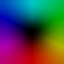

In [ ]:
Image("std_prob_3.out/vortex_000800.png")

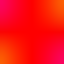

In [ ]:
Image("std_prob_3_uniform.out/flower_000800.png")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!head std_prob_3.out/table.txt

# t (s)	mx ()	my ()	mz ()	E_total (J)	L ()
0	-1.4156103e-07	-7.0466194e-07	-0.41008562	113.992226	8
0	-8.940697e-08	-3.738678e-07	-0.40370756	114.98764	8.05
0	-7.4505806e-08	-2.0884909e-07	-0.3970522	115.97692	8.1
0	-4.4703484e-08	-1.1752127e-07	-0.39043513	116.96016	8.15
0	-2.9802322e-08	-6.5076165e-08	-0.38397193	117.93746	8.2
0	-3.7252903e-08	-3.4226105e-08	-0.37766698	118.90893	8.25
0	-7.450581e-09	-2.363231e-08	-0.371507	119.87462	8.3
0	-7.450581e-09	-1.1175871e-08	-0.3653751	120.834694	8.35
0	1.4901161e-08	-5.005859e-09	-0.35949346	121.7892	8.4


In [ ]:
data_vortex = np.loadtxt('std_prob_3.out/table.txt')
data_flower = np.loadtxt('std_prob_3_uniform.out/table.txt')

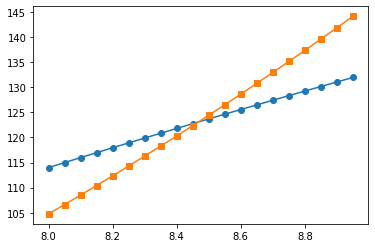

In [ ]:
plt.plot(data_vortex[:, -1], data_vortex[:, -2], 'o-')
plt.plot(data_flower[:, -1], data_flower[:, -2], 's-')

# Std Problem DMI 2D

In [48]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [49]:
!rm -r /content/std_prob_dmi_2d.out

In [51]:
!mumax3 std_prob_dmi_2d.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla K80(11441MB), CUDA Driver 11.2, cc=3.7, using cc=37 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: std_prob_dmi_2d.out/
//starting GUI at http://127.0.0.1:35367
R := 50e-9
nx := 50
ny := 50
nz := 1
dx := 2e-9
dy := 2e-9
dz := 2e-9
SetGridSize(nx, ny, nz)
SetCellSize(dx, dy, dz)
SetGeom(Circle(2 * R))
// Initializing geometry 2 %
// Initializing geometry 100 %
DefRegion(1, circle(R/2))
Msat = 860e3
Aex = 13e-12
Ku1 = 0.4e6
anisU = vector(0, 0, 1)
Dind = 3e-3
NoDemagSpins = 1
m.setRegion(0, uniform(0, 0, -1))
m.setRegion(1, uniform(0,

In [22]:
!cat std_prob_dmi_2d.out/table.txt

# t (s)	mx ()	my ()	mz ()	ext_topologicalcharge ()	ext_topologicalchargelattice ()
0	-8.446002e-10	0	-0.57670563	0.85493493	0.91803914


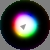

In [23]:
Image('/content/std_prob_dmi_2d.out/m000000.jpg')

In [24]:
!mumax3-convert -png -resize 256x256x1 -arrows 16 std_prob_dmi_2d.out/Skyrmion-Inter.ovf

std_prob_dmi_2d.out/Skyrmion-Inter.ovf
[ ok ] std_prob_dmi_2d.out/Skyrmion-Inter.ovf	-> std_prob_dmi_2d.out/Skyrmion-Inter.png
1 files converted,  0 skipped,  0 failed


In [25]:
!mumax3-convert -png -resize 256x256x1 -arrows 16 std_prob_dmi_2d.out/Skyrmion-Inter-chargedensity.ovf

std_prob_dmi_2d.out/Skyrmion-Inter-chargedensity.ovf
[ ok ] std_prob_dmi_2d.out/Skyrmion-Inter-chargedensity.ovf	-> std_prob_dmi_2d.out/Skyrmion-Inter-chargedensity.png
1 files converted,  0 skipped,  0 failed


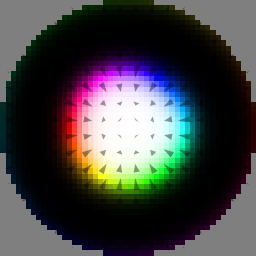

In [26]:
Image('/content/std_prob_dmi_2d.out/Skyrmion-Inter.png')

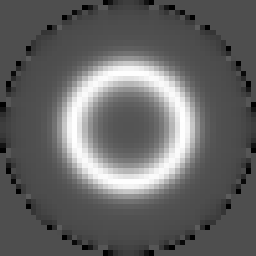

In [15]:
Image('/content/std_prob_dmi_2d.out/Skyrmion-Inter-chargedensity.png')

In [27]:
!mumax3-convert -vtk ascii /content/std_prob_dmi_2d.out/Skyrmion-Inter.ovf

/content/std_prob_dmi_2d.out/Skyrmion-Inter.ovf
[ ok ] /content/std_prob_dmi_2d.out/Skyrmion-Inter.ovf	-> /content/std_prob_dmi_2d.out/Skyrmion-Inter.vts
1 files converted,  0 skipped,  0 failed


In [30]:
# Load the data across the center of the disk
m_center = np.loadtxt('std_prob_dmi_2d.out/Skyrmion-Inter-centerline.ovf')

In [44]:
nm = 1
coords = [1 * nm + i * 2 * nm for i in range(50)]
coords = np.array(coords) - 50 * nm

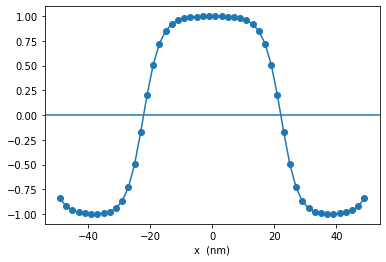

In [45]:
f, ax = plt.subplots()

ax.plot(coords, m_center[:, 2], 'o-')
ax.axhline(y=0)
ax.set_xlabel('x  (nm)')

plt.show()

# Skyrmion racetrack

In [55]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [63]:
!rm -r /content/sk_track.out

In [65]:
!mumax3 sk_track.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla K80(11441MB), CUDA Driver 11.2, cc=3.7, using cc=37 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: sk_track.out/
//starting GUI at http://127.0.0.1:35367
Lx := 300e-9
Ly := 40e-9
Lz := 0.4e-9
nx := pow(2, 8)
ny := 32
nz := 1
SetGridSize(nx, ny, nz)
SetCellSize(Lx/nx, Ly/ny, Lz/nz)
SetPBC(1, 0, 0)
//resizing...
// Initializing geometry 3 %
// Initializing geometry 100 %
Msat = 580e3
Aex = 15e-12
Ku1 = 0.8e6
anisU = vector(0, 0, 1)
Dind = 3e-3
m = uniform(0, 0, 1)
m.setinshape(Circle(20e-9).transl(-120e-9, 0, 0), NeelSkyrmion(1, -1).t

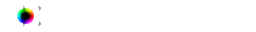

In [66]:
Image('/content/sk_track.out/initial_state.png')

In [ ]:
!mumax3-convert -png -resize 700x100x1 -arrows 16 /content/sk_track.out/m*.ovf

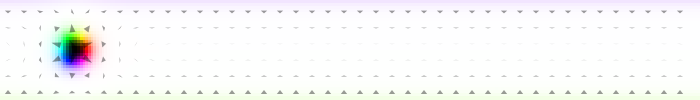

In [70]:
Image('/content/sk_track.out/m000001.png')

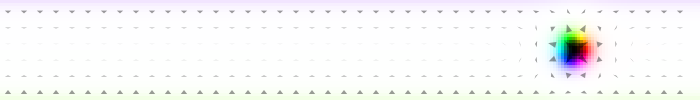

In [74]:
Image('/content/sk_track.out/m000120.png')

In [76]:
!head /content/sk_track.out/table.txt

# t (s)	mx ()	my ()	mz ()	ext_bubbleposx (m)	ext_bubbleposy (m)	ext_bubbleposz (m)	ext_topologicalcharge ()
0	0.00010979501	1.1641532e-10	0.9672046	1.4142394e-09	-6.249976e-10	0	-0.90991676
5.0033566943290544e-11	-2.544566e-07	1.8943101e-06	0.9637539	6.105423e-10	-6.2533617e-10	0	-0.9979534
1.0000665806806223e-10	7.348176e-07	1.38022e-06	0.96384937	5.821824e-10	-6.2537076e-10	0	-0.9979392
1.5004344491247925e-10	7.4613854e-07	1.411885e-06	0.96382695	5.65213e-10	-6.253743e-10	0	-0.99794126
2.000126954924858e-10	7.6126344e-07	1.4454126e-06	0.96382487	5.4722427e-10	-6.254041e-10	0	-0.9979414
2.5004828792346607e-10	7.7540926e-07	1.4640391e-06	0.96382475	5.290031e-10	-6.2536953e-10	0	-0.9979414
3.000173597582655e-10	7.859053e-07	1.4863908e-06	0.96382475	5.108714e-10	-6.253803e-10	0	-0.9979414
3.5005277918646774e-10	7.963995e-07	1.4975667e-06	0.9638248	4.9288273e-10	-6.253719e-10	0	-0.9979414
4.000217522383296e-10	8.034194e-07	1.5161932e-06	0.9638248	4.7480464e-10	-6.2538386e-10	0	-0.9979415


In [80]:
data = np.loadtxt('/content/sk_track.out/table.txt')

time = data[1:, 0]
sk_pos_x = data[1:, -4]
sk_pos_y = data[1:, -3]

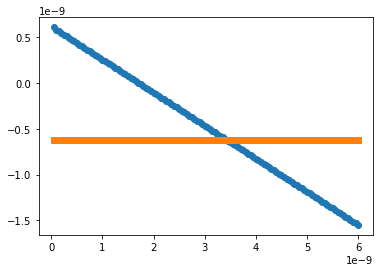

In [81]:
plt.plot(time, sk_pos_x, 'o-')
plt.plot(time, sk_pos_y, 's-')

# Skyrmion track with a notch

In [119]:
!rm -r sk_track_notch.out/

In [120]:
!mumax3 sk_track_notch.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla K80(11441MB), CUDA Driver 11.2, cc=3.7, using cc=37 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: sk_track_notch.out/
//starting GUI at http://127.0.0.1:35367
Lx := 300e-9
Ly := 40e-9
Lz := 0.4e-9
nx := pow(2, 8)
ny := 32
nz := 1
SetGridSize(nx, ny, nz)
SetCellSize(Lx/nx, Ly/ny, Lz/nz)
SetPBC(1, 0, 0)
//resizing...
// Initializing geometry 3 %
// Initializing geometry 100 %
Msat = 580e3
Aex = 15e-12
Ku1 = 0.8e6
anisU = vector(0, 0, 1)
Dind = 3e-3
DefRegion(1, Rect(40e-9, 40e-9).rotZ(45*pi/180).transl(0, 30e-9, 0))
snapshot(regions)

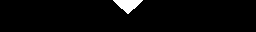

In [115]:
Image('sk_track_notch.out/regions000000.jpg')

In [ ]:
!mumax3-convert -png -resize 700x100x1 -arrows 16 /content/sk_track_notch.out/m*.ovf

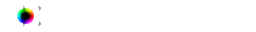

In [117]:
Image('/content/sk_track_notch.out/initial_state.png')

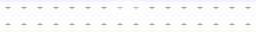

In [118]:
Image('/content/sk_track_notch.out/initial_state_relaxed.png')

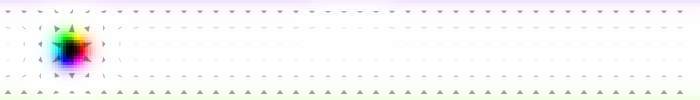

In [124]:
Image('/content/sk_track_notch.out/m000000.png')

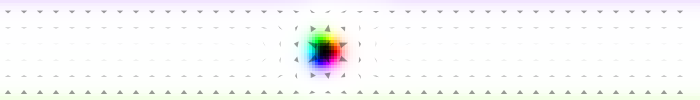

In [129]:
Image('/content/sk_track_notch.out/m000060.png')

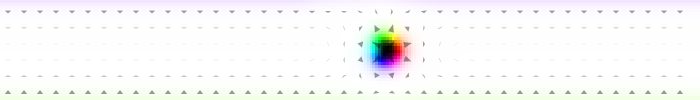

In [136]:
Image('/content/sk_track_notch.out/m000076.png')

In [130]:
!convert m*.png sk_motion.gif

/bin/bash: convert: command not found


In [137]:
data = np.loadtxt('/content/sk_track_notch.out/table.txt')

time = data[1:, 0]
sk_pos_x = data[1:, -4]
sk_pos_y = data[1:, -3]

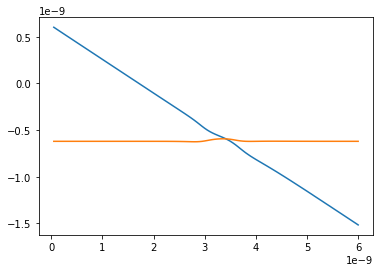

In [139]:
plt.plot(time, sk_pos_x, '-')
plt.plot(time, sk_pos_y, '-')

# MuMax3 from Python

In [121]:
J = -1e-12
sim = f"""
/* Template for the example simulations of the ALMA Tutorials 2021 MuMax3 workshop.
   Author: Dr. David Cortés-Ortuño
   Utrecht University
   d.i.cortes@uu.nl
*/

// Track length
Lx := 300e-9
Ly := 40e-9
Lz := 0.4e-9

// Number of cells (power of 2) -> discretization of ~1.25
nx := pow(2, 8)
ny := 32
nz := 1

// Set mesh and disk geometry
SetGridSize(nx, ny, nz)
SetCellSize(Lx / nx, Ly / ny, Lz / nz)
SetPBC(1, 0, 0)

// SetMesh(nx, ny, nz, Lx / nx, Ly / ny, Lz / nz, 1, 0, 0) 

Msat        = 580e3
Aex         = 15e-12
Ku1         = 0.8e6
anisU       = vector(0, 0, 1)
Dind        = 3e-3
// No Demag:
// NoDemagSpins = 1
// EnableDemag = false

// Define a notch (higher anisotropy)
DefRegion(1, Rect(40e-9, 40e-9).rotZ(45 * pi / 180).transl(0, 30e-9, 0))
snapshot(regions)

Ku1.setRegion(1, 1.2e6)
anisU.setRegion(1, vector(0, 0, 1))

// Initial state
m = uniform(0, 0, 1)
m.setinshape(Circle(20e-9).transl(-120e-9, 0, 0), NeelSkyrmion(1, -1).transl(-120e-9, 0, 0))

snapshotas(m, "initial_state.png")

// Relax the skyrmion from the initial state
minimize()
// relax()

snapshotas(m, "initial_state_relaxed.png")

// Dynamics
alpha = 0.3
// Zhang-Li torque parameters
pol = 0.4
j = vector({J}, 0, 0)
xi = 0.30

tableAdd(ext_bubblepos)
tableadd(ext_topologicalcharge)

autosave(m, 5e-11)
tableautosave(5e-11)

ns := 1e-9
run(6 * ns)
"""

In [122]:
sim

'\n/* Template for the example simulations of the ALMA Tutorials 2021 MuMax3 workshop.\n   Author: Dr. David Cortés-Ortuño\n   Utrecht University\n   d.i.cortes@uu.nl\n*/\n\n// Track length\nLx := 300e-9\nLy := 40e-9\nLz := 0.4e-9\n\n// Number of cells (power of 2) -> discretization of ~1.25\nnx := pow(2, 8)\nny := 32\nnz := 1\n\n// Set mesh and disk geometry\nSetGridSize(nx, ny, nz)\nSetCellSize(Lx / nx, Ly / ny, Lz / nz)\nSetPBC(1, 0, 0)\n\n// SetMesh(nx, ny, nz, Lx / nx, Ly / ny, Lz / nz, 1, 0, 0) \n\nMsat        = 580e3\nAex         = 15e-12\nKu1         = 0.8e6\nanisU       = vector(0, 0, 1)\nDind        = 3e-3\n// No Demag:\n// NoDemagSpins = 1\n// EnableDemag = false\n\n// Define a notch (higher anisotropy)\nDefRegion(1, Rect(40e-9, 40e-9).rotZ(45 * pi / 180).transl(0, 30e-9, 0))\nsnapshot(regions)\n\nKu1.setRegion(1, 1.2e6)\nanisU.setRegion(1, vector(0, 0, 1))\n\n// Initial state\nm = uniform(0, 0, 1)\nm.setinshape(Circle(20e-9).transl(-120e-9, 0, 0), NeelSkyrmion(1, -1).transl

In [ ]:
import os
os.subprocess('mumax3 {}')

# Skyrmion FMR

In [141]:
!mumax3 /content/isolated_sk_fmr.mx3

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla K80(11441MB), CUDA Driver 11.2, cc=3.7, using cc=37 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: /content/isolated_sk_fmr.out/
//starting GUI at http://127.0.0.1:35367
R := 8e-9
nx := 32
ny := 32
nz := 1
dx := 0.5e-9
dy := 0.5e-9
dz := 0.5e-9
SetGridSize(nx, ny, nz)
SetCellSize(dx, dy, dz)
SetGeom(Circle(2 * R))
// Initializing geometry 3 %
// Initializing geometry 100 %
DefRegion(1, Circle(R/2))
Msat = 1.1e6
Aex = 2e-12
Ku1 = 2.5e6
anisU = vector(0, 0, 1)
Dind = -3.9e-3
NoDemagSpins = 1
m.setRegion(0, uniform(0, 0, -1))
m.setRegi

In [142]:
data = np.loadtxt('/content/isolated_sk_fmr.out/table.txt')

In [160]:
# Use the spatially average magnetisation for finding the modes
# quickly
mz = data[:, -1]
time = data[:, 0]
# Time step:
dt = time[1] - time[0]

In [163]:
# Shift the FFT so we have the spectrum centered at 0
# We also compute the frequencies using time scaled in ns so
# frequencies are in GHz
mz_fft = np.abs(np.fft.fftshift(np.fft.fft(mz - mz[0])))
freqs = np.fft.fftshift(np.fft.fftfreq(len(data[:, 0]), d=dt * 1e9))

In [170]:
freqs[:10]

array([-49.87531172, -49.62593516, -49.3765586 , -49.12718204,
       -48.87780549, -48.62842893, -48.37905237, -48.12967581,
       -47.88029925, -47.63092269])

Peak at 8.728179551122196 GHz
Peak at 36.408977556109726 GHz


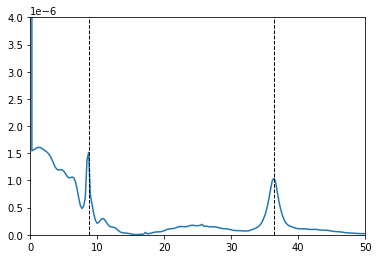

In [192]:
# Now we can observe the modes
plt.plot(freqs, mz_fft ** 2)
plt.ylim(0, 0.000004)
plt.xlim(0, 50)

# By eye the peak is at
print(f'Peak at {freqs[235]} GHz')
plt.axvline(x=freqs[235], c='k', ls='--', lw=1)

print(f'Peak at {freqs[346]} GHz')
plt.axvline(x=freqs[346], c='k', ls='--', lw=1)

plt.show()

In [193]:
# Mumax3 can convert the magnetisation to Numpy arrays:

In [ ]:
!mumax3-convert -numpy /content/isolated_sk_fmr.out/m*.ovf

In [208]:
# Try to find the excitation modes from the spatially averaged
# spectrum
# Stack the XY layer at every time -> every simulation m file:
# m000000 m000001 ... etc
datadyn_stack = []
# We will substract the static comp from every file
d_static = np.load('isolated_sk_fmr.out/m000001.npy')[2][0]
for i in range(1, 401):
  # Take mz (component 2 of the first dimension) and the [0] layer
  # This system only has 1 layer
  d = np.load('isolated_sk_fmr.out/m{:06d}.npy'.format(i))[2][0]
  d = d - d_static
  datadyn_stack.append(d)

datadyn_stack = np.array(datadyn_stack)

In [209]:
datadyn_stack.shape

(400, 32, 32)

In [210]:
# Do FFT on every node of the layer 
# (across 1st dimension, which is time -> remember we stacked m)
# The fftshift is also at the first dimension
datadyn_fft = np.fft.fftshift(np.fft.fft(datadyn_stack, axis=0), axes=0)

We can now plot the resonance modes:

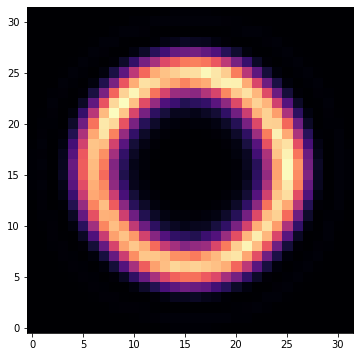

In [211]:
# From the spatially avgd spectrum we had a peak at
peak1_idx = 173

plt.figure(figsize=(6, 6))
plt.imshow(np.abs(datadyn_fft[peak1_idx]) ** 2, 
           cmap='magma', origin='lower')  # change origin of plot
plt.show()

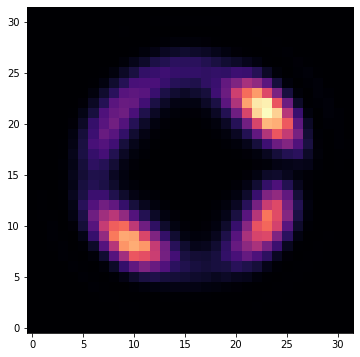

In [215]:
# From the spatially avgd spectrum we had a peak at
peak2_idx = 346

plt.figure(figsize=(6, 6))
plt.imshow(np.abs(datadyn_fft[peak2_idx]) ** 2, 
           cmap='magma', origin='lower')  # change origin of plot
plt.show()

In [221]:
# we can also have a more complete spectrum by averaging
# the FFT from every node at every time
fft_avgd = np.mean(datadyn_fft, axis=(1, 2))
# We have 400 files:
freqs_avgd = np.fft.fftshift(np.fft.fftfreq(400, d=dt * 1e9))

In [223]:
fft_avgd.shape

(400,)

Peak at 8.728179551122196 GHz
Peak at 36.408977556109726 GHz


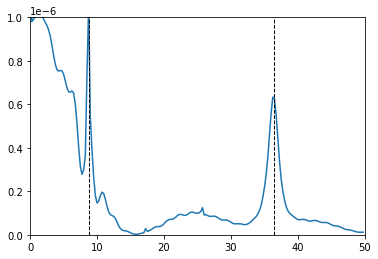

In [229]:
# Now we can observe smaller peaks, but the main modes are
# located at the same frequencies

plt.plot(freqs_avgd, np.abs(fft_avgd) ** 2)
plt.ylim(0, 0.000001)
plt.xlim(0, 50)

# By eye the peak is at
print(f'Peak at {freqs[235]} GHz')
plt.axvline(x=freqs[235], c='k', ls='--', lw=1)

print(f'Peak at {freqs[346]} GHz')
plt.axvline(x=freqs[346], c='k', ls='--', lw=1)

plt.show()